In [22]:
! pip install tqdm update_checker tqdm
! pip install tpot
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import FastICA
from sklearn.svm import SVC
from sklearn.cross_decomposition import PLSRegression
from sklearn.manifold import MDS
import os
from PIL import Image
from PIL import UnidentifiedImageError
import keras
import matplotlib.image as mpimg
from matplotlib.image import imread
import cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
train_csv = pd.read_csv("/content/train.csv")
test_csv = pd.read_csv("/content/test_WyRytb0.csv")
print(train_csv.shape,test_csv.shape)
x = train_csv.iloc[:, :-1]
y = train_csv.iloc[:, -1]

(17034, 2) (7301, 1)


In [21]:
# Create list to store the data and set the path of the image to load
data_with_labels = []
labels = []
data_test = []
imagePath = '/content/drive/MyDrive/blurredd/blurry/*.jpg'

In [23]:
# Create the training dataset 
for i in train_csv.index: 
    nameOfFile = train_csv['image_name'][i]
    if os.path.exists(imagePath+nameOfFile):
        image = mpimg.imread(imagePath+nameOfFile)
        if (len(image.shape)!=3): # Verify if the image is correct 
            print("L'image N°",i,' : ',nameOfFile,"")
        else : 
            image = cv2.resize(image,(150,150))
            data_with_labels.append(image)
            labels.append(train_csv['label'][i])
print(len(data_with_labels))
print(len(labels))

0
0


In [24]:
import glob

glob.glob(imagePath)
imagess = [cv2.imread(images) for images in glob.glob(imagePath)]

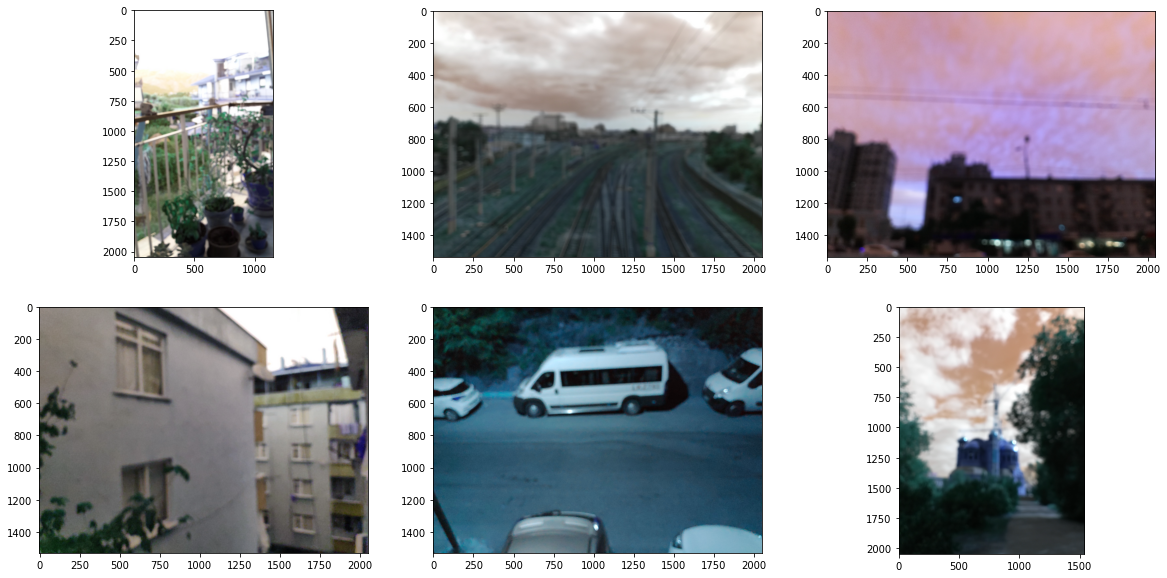

In [25]:
type(imagess)
rows = 2
cols = 3

fig = plt.figure(figsize=(20,10))
for j in range(0, rows*cols):
     fig.add_subplot(rows, cols, j+1)
     plt.imshow(imagess[j])

In [3]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

In [4]:
pls = PLSRegression(n_components=9)
pls.fit(x_sc, y)

PLSRegression(n_components=9)

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(x_sc, y, train_size=0.70, random_state=2)
input_shape = [X_train.shape[1]]

In [6]:
model_svm = SVC(random_state=1)
model_svm.fit(X_train, Y_train)
y_pred_svm = model_svm.predict(X_test)
print(classification_report(Y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      2172
           1       0.89      0.78      0.83      3050

    accuracy                           0.81      5222
   macro avg       0.81      0.82      0.81      5222
weighted avg       0.82      0.81      0.81      5222



0.8121409421677518

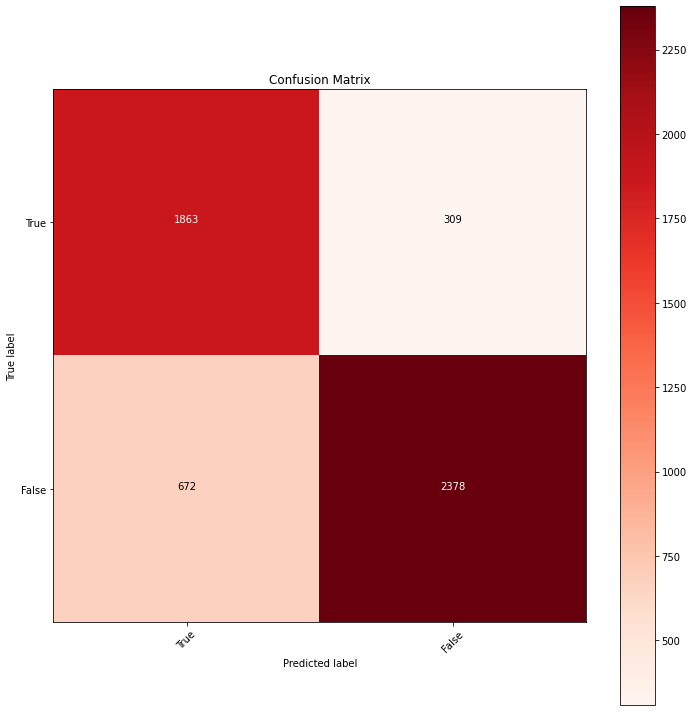

In [13]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(Y_test, y_pred_svm)
target_names = ["True", "False"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(Y_test, y_pred_svm)

roc_auc_score for SVM:  0.8187034688886876


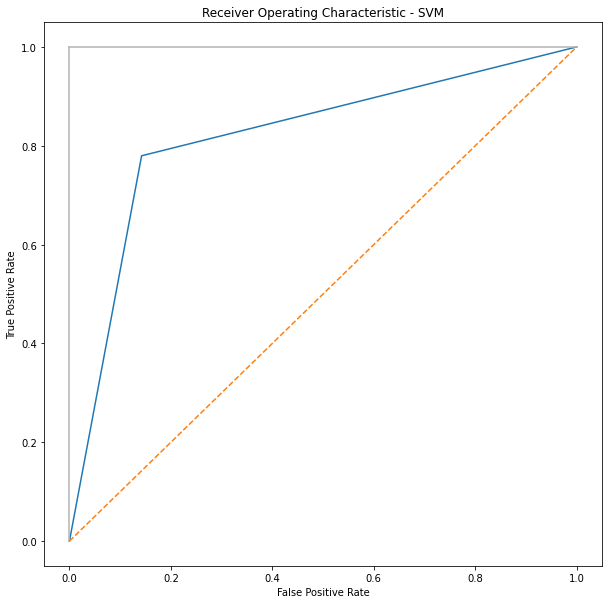

In [14]:
# plot for SVM
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_pred_svm)
print('roc_auc_score for SVM: ', roc_auc_score(Y_test, y_pred_svm))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [9]:
#KNN model

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, Y_train)
y_pred_KNN = model_KNN.predict(X_test)
print(classification_report(Y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      2172
           1       0.88      0.78      0.83      3050

    accuracy                           0.81      5222
   macro avg       0.81      0.82      0.81      5222
weighted avg       0.82      0.81      0.81      5222



0.8104174645729606

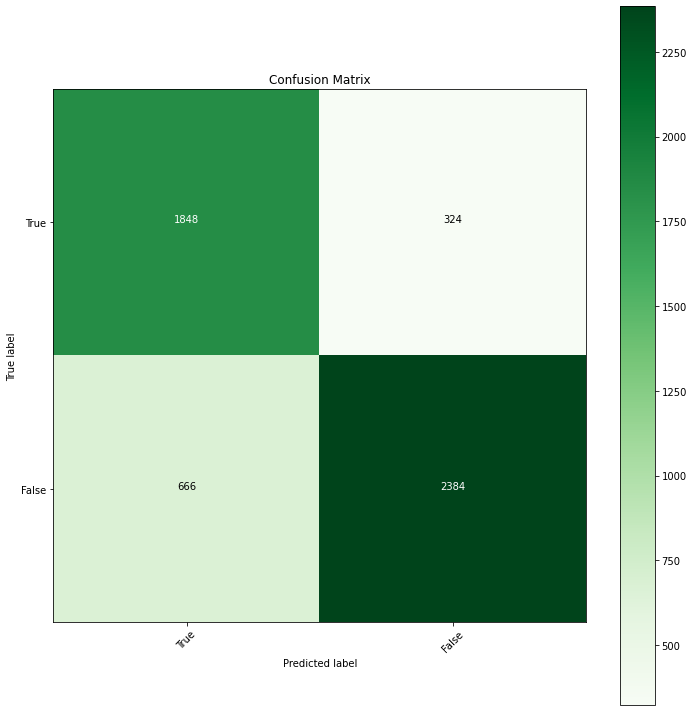

In [15]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(Y_test, y_pred_KNN)
target_names = ["True", "False"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(Y_test, y_pred_KNN)

roc_auc_score for KNN:  0.8162340367720315


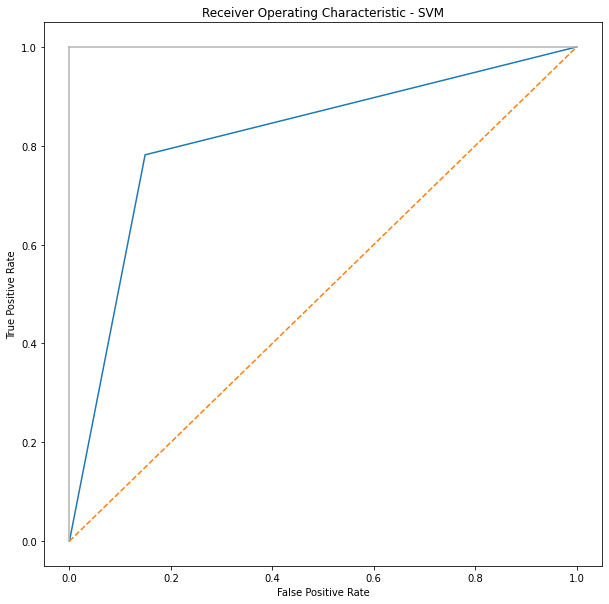

In [16]:
# plot for KNN
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_pred_KNN)
print('roc_auc_score for KNN: ', roc_auc_score(Y_test, y_pred_KNN))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [11]:
#RandomForestClassifier(ensemble) model

model_RFC = RandomForestClassifier(random_state = 1)
model_RFC.fit(X_train, Y_train)
y_pred_RFC = model_RFC.predict(X_test)
print(classification_report(Y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83      2172
           1       0.92      0.81      0.86      3050

    accuracy                           0.85      5222
   macro avg       0.85      0.86      0.85      5222
weighted avg       0.86      0.85      0.85      5222



0.8502489467636921

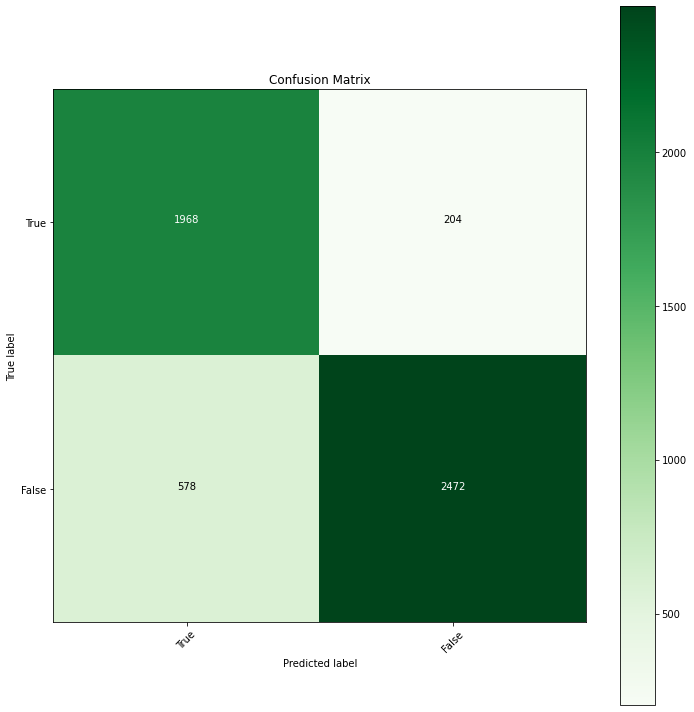

In [29]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(Y_test, y_pred_RFC)
target_names = ["True", "False"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(Y_test, y_pred_RFC)

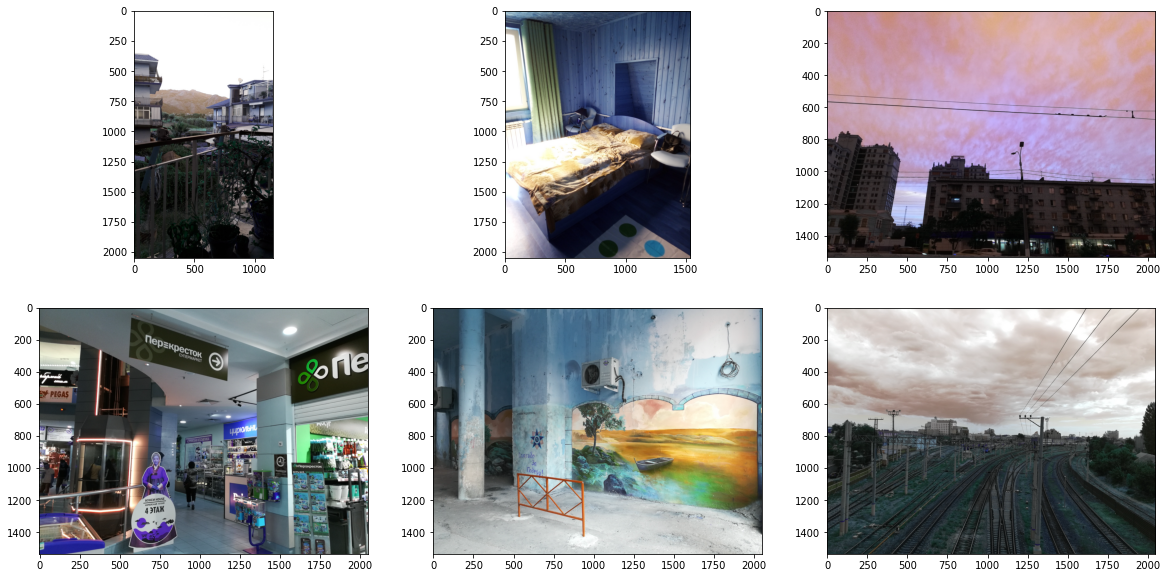

In [28]:
# The blur images transformed to clear images

type(imagesss)
rows = 2
cols = 3

fig = plt.figure(figsize=(20,10))
for j in range(0, rows*cols):
     fig.add_subplot(rows, cols, j+1)
     plt.imshow(imagesss[j])

roc_auc_score for RFC:  0.8582845756724934


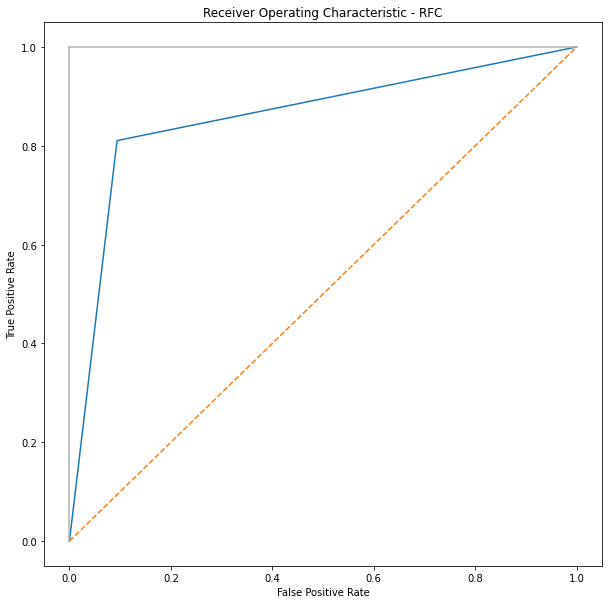

In [18]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_pred_RFC)
print('roc_auc_score for RFC: ', roc_auc_score(Y_test, y_pred_RFC))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RFC')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()